## Ahmad Hojatimalekshah

### Collaborate: Arash Modaresi, Amir Kazemzadeh

# Notes

Put your homework in the directory with your name. Please mentionin this file the names of any students with whom you collaborated. If you didn't collaborate with anyone, mark your collaborators as "None." 
Remember, your goal is to communicate. Full credit will be given only to correct solutions which are described clearly. Convoluted and obtuse descriptions will receive low marks. 
To complete your homework, you may ONLY consult the following material: 
1.	lecture slides
2.	course notes you or others took during lecture.
3.	the required text (CLRS)
4.	websites that may clarify the concepts covered in the material but do not in any way provide complete solutions to the problems.

Deadline 2/19/2019

Please provide an answer to the following questions: 

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math 

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


# Question 1 (10 pts)

Create a script that: 
1. load the iris data.
2. scale the indipendent features.
3. compute the correlation coefficients and co-variance among all the pair of indipendent features.
4. compute the PCA and show the principal components (their coefficients) 
5. compute the correlation coefficient between each original feature and the new features generated by the PCA 


### Loading iris Data

In [0]:
iris_d = sm.datasets.get_rdataset('iris')
iris = iris_d.data
iris.rename(columns=lambda x: x.replace('.', ''), inplace=True)
iris.head()

C:\ProgramData\Anaconda\lib\site-packages\statsmodels\datasets\utils.py:192: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
df_iris=iris.drop(labels='Species', axis=1)

#### Scaling the data

In [0]:
sc = StandardScaler()
sc.fit(df_iris)
df_std = pd.DataFrame(sc.transform(df_iris),columns={'SepalLength','SepalWidth','PetalLength','PetalWidth'})
df_std.head()

,SepalLength,PetalWidth,PetalLength,SepalWidth
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


3. compute the correlation coefficients and co-variance among all the pair of indipendent features.

In [0]:
df_std.corr()

,SepalLength,PetalWidth,PetalLength,SepalWidth
SepalLength,1.000000,-0.117570,0.871754,0.817941
PetalWidth,-0.117570,1.000000,-0.428440,-0.366126
PetalLength,0.871754,-0.428440,1.000000,0.962865
SepalWidth,0.817941,-0.366126,0.962865,1.000000


In [0]:
df_std.cov()

,SepalLength,PetalWidth,PetalLength,SepalWidth
SepalLength,1.006711,-0.118359,0.877604,0.823431
PetalWidth,-0.118359,1.006711,-0.431316,-0.368583
PetalLength,0.877604,-0.431316,1.006711,0.969328
SepalWidth,0.823431,-0.368583,0.969328,1.006711


4. compute the PCA and show the principal components (their coefficients) 

In [0]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2','PC3','PC4'])

### How much variance each component explains

In [0]:
pd.DataFrame(pca.explained_variance_ratio_,columns={'Data Vriation cover ratio'})

,Data Vriation cover ratio
0,0.729624
1,0.228508
2,0.036689
3,0.005179


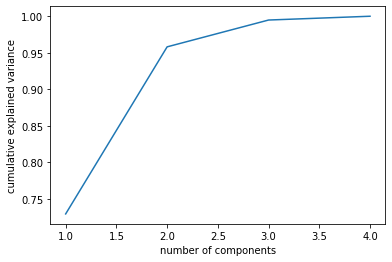

In [0]:
plt.plot([1,2,3,4],np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**It seems the first 2 components explain more than 95% of the dataset. Then we takes the first 2 components.**

In [0]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_std)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

**Lets print eigen values**

In [0]:
pd.DataFrame(pca.explained_variance_,columns={'Eigen Values'})

,Eigen Values
0,2.938085
1,0.920165


**Lets print eigen vectors**

In [0]:
pd.DataFrame((pca.components_).T,columns=['Eigen Vectors1','Eigen Vectors2'])

,Eigen Vectors1,Eigen Vectors2
0,0.521066,0.377418
1,-0.269347,0.923296
2,0.580413,0.024492
3,0.564857,0.066942


**Principal components (transformed data)**

In [0]:
principalDf.head()

,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


5. compute the correlation coefficient between each original feature and the new features generated by the PCA 

**We concatenate the raw data with the PCA transformed one and then compute the correlation coefficient between those two.**

In [0]:
result = pd.concat([df_std, principalDf], axis=1, sort=False)
result.corr()[['PC1', 'PC2']]

,PC1,PC2
SepalLength,8.901688e-01,3.608299e-01
PetalWidth,-4.601427e-01,8.827163e-01
PetalLength,9.915552e-01,2.341519e-02
SepalWidth,9.649790e-01,6.399985e-02
PC1,1.000000e+00,3.277960e-16
PC2,3.277960e-16,1.000000e+00


Score 9

P4: -1;

# Question 2 (5 pts + (5 pts Extra))

1. What you can observe by comparing the results in Question1 of the point 4 and 5?

**- As we see from the correlation table above, the first principal component is highly correlated with SepalLength, PetalWidth and PetalLength and the second component is highly correlated with SepalWidth. This means that the first component mostly explains SepalLength, PetalWidth and PetalLength which are highly correlated in the raw data and the second component mostly explains SepalWidth which is almost independant from the other features in the raw dataset. The low correlation between PC1 and PC2 also shows the Independency of the two PCAs.**

2. Can you define any property?


**- In addition, it seems the correlation coefficient from part 5 of question 1 has a relation between the raw dataset and the PCA transformed one. I prove this relation in below and examine it numerically from our results.**



3. If there is any property are you able to formally prove it? (5 extra pts)


$$r = a_{ij} \frac{std(y_j)}{std(x_i)}$$

The above equation shows the correlation coefficient between the raw data \$(X)$ and principal components **(Y)**

Where, \$a$ is the eigenvector of the **X**'s covariance matrix,

**i** is the number of features and **j** is the number of principal components.

The correlation of Principal components and the raw data:


\$$ Y= A^{T}(X-\mu)$$

$$Cov(X,Y) = E[(X-\mu)Y^{T}] = E[(X-\mu)(X-\mu)^{T}A] = \Sigma{A}$$
    
    
and from spectral decomposition:

$$\Sigma{A} = (A{\Lambda}A^{T}){A} = A{\Lambda}$$

Then, 

$$Cov(X,Y) = A{\Lambda}$$

$$\Rightarrow Cov(x_{i},y_{j}) = \lambda_{j}a_{ij}$$

According to the correlation equation:

$$\rho(x_{i},y_{j}) = \frac{Cov(x_{i},y_{j})}{Var(x_{i})Var(y_{j})}$$

$$ = \frac{\lambda_{j}a_{ij}}{(\sigma_{ii})^{\frac{1}{2}}(\lambda_{j})^{\frac{1}{2}}}$$

$$ = a_{ij}(\frac{\lambda_{j}}{\sigma_{ii}})^{\frac{1}{2}}$$

$$ = a_{ij}\frac{std(y_{j})}{std(x_{i})}$$



**Lets examine the above equation with our data.**

- For the first principal component

In [0]:
np.std(result['PC1'])/np.std(result['PetalWidth'])*pca.components_[0]

array([ 0.89016876, -0.46014271,  0.99155518,  0.96497896])

- For the second principal component

In [0]:
np.std(result['PC2'])/np.std(result['PetalWidth'])*pca.components_[1]

array([0.36082989, 0.88271627, 0.02341519, 0.06399985])

**As we scaled the raw data (to $\mu=0$ and $\sigma=1$), standard deviation for its features would be 1 and we can randomly 
select one of them as \$X_i$. (Here we selected `PetalWidth`)**

**Lets see the variance-covariance matrix for the raw and PCA transformed data** 

In [0]:
result.cov()

,SepalLength,PetalWidth,PetalLength,SepalWidth,PC1,PC2
SepalLength,1.006711,-0.118359,0.877604,0.823431,1.530936e+00,3.472864e-01
PetalWidth,-0.118359,1.006711,-0.431316,-0.368583,-7.913657e-01,8.495843e-01
PetalLength,0.877604,-0.431316,1.006711,0.969328,1.705303e+00,2.253632e-02
SepalWidth,0.823431,-0.368583,0.969328,1.006711,1.659597e+00,6.159767e-02
PC1,1.530936,-0.791366,1.705303,1.659597,2.938085e+00,5.878125e-16
PC2,0.347286,0.849584,0.022536,0.061598,5.878125e-16,9.201649e-01


**The low covarinace (zero) between PC1 and PC2 shows the orthogonality of the two PCAs.**

Score 4;

# Question 3 (10 pts)

1) Write a code in pure python (Numpy and Scipy are allowed, do not use scikit) able to create a decision tree. In input, you should provide the independent features and the dependent feature (the class) separately.
You can assume that the dependent features and the independent feature are binary. Please implements the Gini index and the entropy gain ratio. You can read the code available online, but you cannot plagiarize it.

2) Create a toy example to run and test your code (please show the result).



**Lets read the example dataset which contains the GRE score, GPA and rank of students and whether they are accepted or not at the university (admit column)**

In [0]:
students = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

**we move the admit to the last column in the dataframe**

In [0]:
df0 = students.pop('admit')
students['admit']=df0

## Decision Tree

**For writing a decision tree we need some functions. The first function (left_right) devides the dataset into left and right data
according to the split criteria (splt_crt) and the column number of the data (cl_num) which we want to split.**

In [0]:
def left_right(data,cl_num,splt_crt):
    Y = data.iloc[:,-1]
    X = data.iloc[:,0:len(data)-1]
    left = X[X.iloc[:,cl_num] < splt_crt]
    right = X[X.iloc[:,cl_num] >= splt_crt]
    return left, right

**We also need to define a split criteria and select what feature should split first in our tree. `Info_gain` function returns column number (col_min)
of the feature that should be splitted first and the split criteria for that feature according to the Gini Index. It also returns 
the Impurity weight (weight_Imp) which helps us to decide after what depth we do not need more split and spliting does not add too much to our information (one of the tresholds to terminate the devision).**

In [0]:
def Info_gain(data):
    gini = np.zeros((len(data),len(data.columns)-1))
    w_Imp = np.zeros((len(data),len(data.columns)-1))
    for i in range(len(data.columns)-1):
        for j in range(len(data)):
            splt_crt = data.iloc[j,i]
            left, right = left_right(data,i,splt_crt)
            Y_l = left.iloc[:,-1]
            Y_r = right.iloc[:,-1]
            if len(Y_l)== 0:
                left_Imp = 0
            else:
                left_Imp = 1-(sum(Y_l)/len(Y_l))**2-((len(Y_l)-sum(Y_l))/len(Y_l))**2   ## left Impurity
            if len(Y_r)== 0:
                right_Imp = 0
            else:
                right_Imp = 1-(sum(Y_r)/len(Y_r))**2-((len(Y_r)-sum(Y_r))/len(Y_r))**2  ## right Impurity
            Imp = 1-(len(Y_l)/len(data))**2-(len(Y_r)/len(data))**2                     ## Impurity
            gain = Imp-(len(Y_l)/len(data))*left_Imp-(len(Y_r)/len(data))*right_Imp     ## Information Gain
            w_Imp[j,i] = (len(Y_l)+len(Y_r))/len(data)*gain                             ## Impurity Weight
            gini[j,i] = (len(Y_l)/len(data))*left_Imp+(len(Y_r)/len(data))*right_Imp    ## Gini Index
    row_min = np.argmin(np.min(gini, axis=1))
    col_min = np.argmin(np.min(gini, axis=0))
    splt_crt = data.iloc[row_min,col_min]
    weight_Imp = w_Imp[row_min,col_min]
    return col_min, splt_crt, weight_Imp

**As we need the output of the decision tree, we define a function that terminates the tree branches and print the admit
result (0 or 1)**

In [0]:
def terminate(group):
    max_value_count = list(group.iloc[:,-1].mode())
    return max_value_count

**Split function is the main function of the decision tree algorithm. We recursively split the dataset to right and left branches according to the split criteria (Gini Index or Entropy). This function needs the dataset that we want to create a decision tree for it `(features)`, the minimum row numbers to define the minimum required observation in each branch that we are allowded to split `(min_rows)`, maximum depth of the tree `(max_depth)`, a threshold `(tresh)` for Impurity weight (If the Impurity weight is less than threshold we terminate the tree because spliting does not add any information for us), `depth` which is the numerator for how deep we go in the tree and the `result` which the function returns(contains data column index(the data that is splitted), split criteria, depth of the current branch, the branch name (left or right). For the end of a tree branch we print -1 and -1 which means None value, depth, left or right branch and admit value (1 or 0))**

In [0]:
def split(features,min_rows,max_depth,tresh,depth,result):
    cl_num,splt_crt,weight_Imp= Info_gain(features)
    left,right = left_right(features,cl_num,splt_crt)
    if depth >= max_depth:
        result.append([-1,-1,depth,'left',np.array(terminate(left))[0]])
        result.append([-1,-1,depth,'right',np.array(terminate(right))[0]])
        return
    if len(left)<= min_rows or weight_Imp <= tresh:
        result.append([-1,-1,depth,'left',np.array(terminate(left))[0]])
    else:
        result.append([Info_gain(left)[0],Info_gain(left)[1],depth,'left'])
        split(left,min_rows,max_depth,tresh,depth+1,result)
    if len(right) <= min_rows or weight_Imp <= tresh:
        result.append([-1,-1,depth,'right',np.array(terminate(right))[0]])
    else:
        result.append([Info_gain(right)[0],Info_gain(right)[1],depth,'right'])
        split(right,min_rows,max_depth,tresh,depth+1,result)            
    return result

**To predict the admit results for test data we need to define a predict function for our decision tree. I saved the decision tree in the `split` function as a list of branches that each row of the list is a branch (Materialized Path format). In the predict function I first read the first row of the list which is the first node with depth=0 and compare the test data with its criteria, If the test data feature value is less than that criteria we need to move to the left branch with depth 1, In that case we do not need all branches that are made by right branch with depth=1. This helps to get rid of unneccessary branches, in the next step we compare the data value to the second node condition (second on the left here) and if it is greater than the criteria for example we need to move to the depth 2 (depth+1) and left branch. Then we remove all branches that are made with the left node at depth=2. This approach continues untill we reach to the end of the decision tree and finally return the prediction value of that node.**

In [0]:
def predict(data,tree,row):
    depth = 0
    n = len(tree)-1
    d = max(tree['Depth'])
    row_b=0
    while (tree['Index'][row_b])>=0:
        if data.loc[row][int(tree['Index'][row_b])] < tree['Criteria'][row_b]:
            depth = depth+1
            row_b = int(tree[(tree['Depth']==depth) & (tree['branch']=='left')].index.tolist()[0])
            row_end =int(tree[(tree['Depth']==depth) & (tree['branch']=='right')].index.tolist()[0])
            tree = tree.loc[row_b:row_end,:]
            prd = tree['value'][row_b]
            
        else:
            depth = depth+1
            row_b = int(tree[(tree['Depth']==depth) & (tree['branch']=='right')].index.tolist()[0])
            tree = tree.loc[row_b:,:]
            prd = tree['value'][row_b]
            
    return prd

**Lets devide our dataset to test and train group**

In [0]:
test = students.sample(frac=0.2,random_state=4)
train_mask = pd.Series(True, index=students.index)
train_mask[test.index] = False
train = students[train_mask].reset_index()
del train['index']
test = test.reset_index()
del test['index']

### 1. Decision tree result With Gini Index

**Lets create a decision tree with the train dataset with maximum depth = 5**

In [0]:
res = [[Info_gain(train)[0],Info_gain(train)[1],0,'left']]
tree = split(train,10,5,0,1,res)
df = pd.DataFrame(tree,columns=['Index','Criteria','Depth','branch','value'])

**Lets predict the train admit values with our decision tree (we want this to check for overfitting by comparing with the test prediction)** 

In [0]:
prd_train = np.zeros((len(train),3))
for row in range(len(train)):
    prd_train[row,0] = predict(train,df,row)
    prd_train[row,1] = train['admit'][row]
    prd_train[row,2] = 1

**Lets create the confusion matrix**

In [0]:
prd_admt_train = pd.DataFrame(prd_train,columns=['Estimate','admit','count'])
out_counts_train = prd_admt_train.groupby(['Estimate', 'admit'])['count'].count()
out_counts_train.unstack()

admit,0.0,1.0
Estimate,,
0.0,210,77
1.0,7,26


**Lets see the accuracy of the decision tree for train data**

In [0]:
(out_counts_train[0][0]+out_counts_train[1][1])/sum(out_counts_train)

0.7375

**Now, we predict the admit values with test dataset**

In [0]:
prd_test = np.zeros((len(test),3))
for row in range(len(test)):
    prd_test[row,0] = predict(test,df,row)
    prd_test[row,1] = test['admit'][row]
    prd_test[row,2] = 1

**Confusion Matrix for test dataset**

In [0]:
prd_admt_test = pd.DataFrame(prd_test,columns=['estimate','admit','count'])
out_counts_test = prd_admt_test.groupby(['estimate', 'admit'])['count'].count()
out_counts_test.unstack()

admit,0.0,1.0
estimate,,
0.0,52,19
1.0,4,5


**The accuracy for the test dataset**

In [0]:
(out_counts_test[0][0]+out_counts_test[1][1])/sum(out_counts_test)

0.7125

**It seems that the model does not overfit and it returns hich accuracy**

### 2. Decision tree result With Entropy

**Lets define Info_gain function for entropy**

In [0]:
def Info_gain_entropy(data):
    entropy = np.zeros((len(data),len(data.columns)-1))
    for i in range(len(data.columns)-1):
        for j in range(len(data)):
            splt_crt = data.iloc[j,i]
            left, right = left_right(data,i,splt_crt)
            Y_l = left.iloc[:,-1]
            Y_r = right.iloc[:,-1]
            if len(Y_l)== 0:
                left_Imp = 0
            else:
                p_l = (sum(Y_l)/len(Y_l))
                if p_l==0 or p_l==1:
                    a=0
                    b=0
                else:
                    a = np.log2(p_l)
                    b = np.log2(1-p_l)
                left_Imp = -float(p_l)*float(a)-(1-float(p_l))*float(b)                   ## left Impurity
            if len(Y_r)== 0:
                right_Imp = 0
            else:
                p_r = sum(Y_r)/len(Y_r)
                if p_r==0 or p_r==1:
                    a=0
                    b=0
                else:
                    a = np.log2(p_r)
                    b = np.log2(1-p_r)
                right_Imp = -p_r*a-(1-p_r)*b                                              ## right Impurity
            entropy[j,i] = (len(Y_l)/len(data))*left_Imp+(len(Y_r)/len(data))*right_Imp   ## Entropy
    row_min = np.argmin(np.min(entropy, axis=1))
    col_min = np.argmin(np.min(entropy, axis=0))
    splt_crt = data.iloc[row_min,col_min]
    return col_min, splt_crt

**Split function for entropy**

In [0]:
def split_entropy(features,min_rows,max_depth,depth,result):
    cl_num,splt_crt= Info_gain_entropy(features)
    left,right = left_right(features,cl_num,splt_crt)
    if depth >= max_depth:
        result.append([-1,-1,depth,'left',np.array(terminate(left))[0]])
        result.append([-1,-1,depth,'right',np.array(terminate(right))[0]])
        return
    if len(left)<= min_rows:
        result.append([-1,-1,depth,'left',np.array(terminate(left))[0]])
    else:
        result.append([Info_gain_entropy(left)[0],Info_gain_entropy(left)[1],depth,'left'])
        split_entropy(left,min_rows,max_depth,depth+1,result)
    if len(right) <= min_rows:
        result.append([-1,-1,depth,'right',np.array(terminate(right))[0]])
    else:
        result.append([Info_gain_entropy(right)[0],Info_gain_entropy(right)[1],depth,'right'])
        split_entropy(right,min_rows,max_depth,depth+1,result)            
    return result

**Decision tree for entropy**

In [0]:
res = [[Info_gain_entropy(train)[0],Info_gain_entropy(train)[1],0,'left']]
tree_entropy = split_entropy(train,10,5,1,res)
df_entropy = pd.DataFrame(tree_entropy,columns=['Index','Criteria','Depth','branch','value'])

**Train prediction for entropy**

In [0]:
prd_train = np.zeros((len(train),3))
for row in range(len(train)):
    prd_train[row,0] = predict(train,df_entropy,row)
    prd_train[row,1] = train['admit'][row]
    prd_train[row,2] = 1

**Confusion Matrix for train entropy**

In [0]:
prd_admt_train = pd.DataFrame(prd_train,columns=['Estimate','admit','count'])
out_counts_train = prd_admt_train.groupby(['Estimate', 'admit'])['count'].count()
out_counts_train.unstack()

admit,0.0,1.0
Estimate,,
0.0,203,59
1.0,14,44


**Train accuracy by entropy**

In [0]:
(out_counts_train[0][0]+out_counts_train[1][1])/sum(out_counts_train)

0.771875

**Test prediction by entropy**

In [0]:
prd_test = np.zeros((len(test),3))
for row in range(len(test)):
    prd_test[row,0] = predict(test,df_entropy,row)
    prd_test[row,1] = test['admit'][row]
    prd_test[row,2] = 1

**Test confusion matrix for entropy**

In [0]:
prd_admt_test = pd.DataFrame(prd_test,columns=['estimate','admit','count'])
out_counts_test = prd_admt_test.groupby(['estimate', 'admit'])['count'].count()
out_counts_test.unstack()

admit,0.0,1.0
estimate,,
0.0,50,19
1.0,6,5


**Test accuracy ny emtropy**

In [0]:
(out_counts_test[0][0]+out_counts_test[1][1])/sum(out_counts_test)

0.6875

**Training accuracy for entropy is higher than gini index but the test accuracy for it is less**

Score: 10

Total: 23